In [35]:
from pyzbar import pyzbar
import cv2
from matplotlib import pyplot as plt
import numpy as np

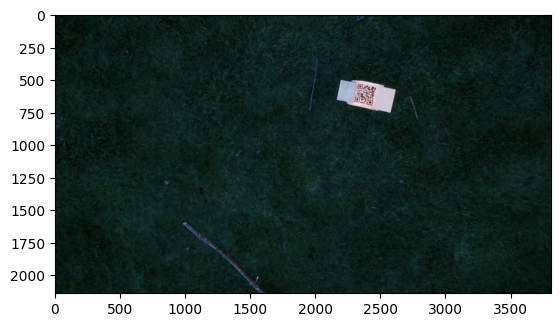

In [51]:
image = cv2.imread("code3.png")
plt.imshow(image)

In [59]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(gray, 120, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

kernel = np.ones((5, 5), np.uint8)
thresh = cv2.dilate(thresh, kernel, iterations=1)
thresh = 255-thresh

contours, _ = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

bboxes = []
for cnt in contours:
    area = cv2.contourArea(cnt)
    xmin, ymin, width, height = cv2.boundingRect(cnt)
    extent = area / (width * height)
    
    # filter non-rectangular objects and small objects
    if (area > 1000) and (abs(width-height) < 10):
        bboxes.append((xmin, ymin, xmin + width, ymin + height))
    
print(bboxes)


[(2391, 653, 2440, 704), (2293, 631, 2342, 680), (2316, 532, 2365, 579)]


True

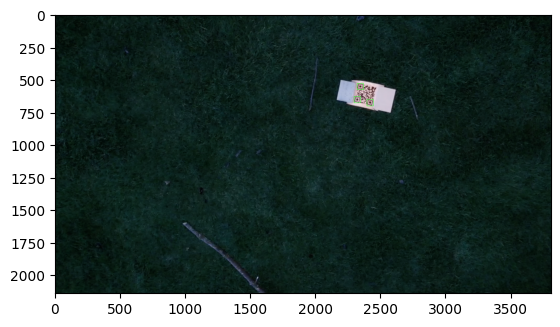

In [60]:
# draw bboxes on image
out = image.copy()
for xmin, ymin, xmax, ymax in bboxes:
    out = cv2.rectangle(out, (xmin, ymin), (xmax, ymax), (0, 255, 0), 2)

plt.imshow(out)
cv2.imwrite("out.png", out)